In [4]:
import numpy as np
import h5py
import pandas as pd
import squidpy as sq
import scanpy as sc

In [5]:
superpatch_dir = "/data1/r20user2/wsi_data/TCGA_NSCLC/extracted_mag20x_patch256/uni_pt_patch_features/superpatch"
csv_path = "/home/fywang/Documents/SPANTHER/src/dataset_csv/NSCLC/classification.csv"
df = pd.read_csv(csv_path)

In [9]:
for row in df.itertuples():
    slide_id = row.slide_id
    superpatch_path = f"{superpatch_dir}/{slide_id}.h5"
    break

In [12]:
with h5py.File(superpatch_path, "r") as f:
    coords = f["coords"][:]
    features = f["features"][:]

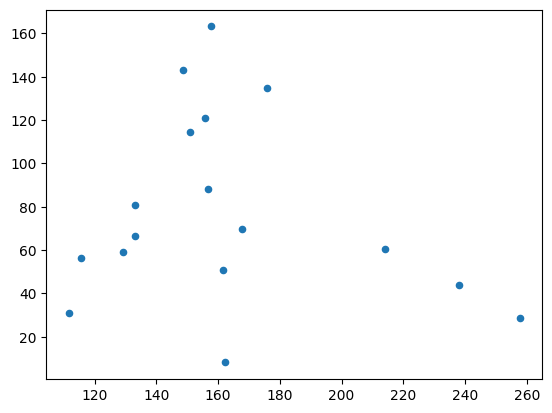

In [34]:
import matplotlib.pyplot as plt
plt.scatter(coords[:, 0], coords[:, 1], s=20)

In [26]:
adata = sc.AnnData(features)
adata.uns["spatial"] = coords
adata.obsm["spatial"] = coords
adata

AnnData object with n_obs × n_vars = 17 × 1024
    uns: 'spatial'
    obsm: 'spatial'

In [27]:
sq.gr.spatial_neighbors(adata, n_rings=2, coord_type="grid", n_neighs=6)

In [28]:
adata

AnnData object with n_obs × n_vars = 17 × 1024
    uns: 'spatial', 'spatial_neighbors'
    obsm: 'spatial'
    obsp: 'spatial_connectivities', 'spatial_distances'

In [31]:
adata.obsp["spatial_distances"]

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 127 stored elements and shape (17, 17)>

In [29]:
adata.obsp["spatial_connectivities"]

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 127 stored elements and shape (17, 17)>

In [30]:
_, idx = adata.obsp["spatial_connectivities"].nonzero()
sq.pl.spatial_scatter(
    adata,
    connectivity_key="spatial_connectivities",
    img=False,
    na_color="lightgrey",
)

ValueError: Found `library_id: `[array([133.02892,  66.58345], dtype=float32), array([161.65234 ,  50.911694], dtype=float32), array([213.98846 ,  60.427345], dtype=float32), array([167.62462,  69.79957], dtype=float32), array([156.79437,  88.00685], dtype=float32), array([238.01718,  44.07983], dtype=float32), array([150.85834, 114.73471], dtype=float32), array([175.94215, 135.04242], dtype=float32), array([115.45465,  56.29736], dtype=float32), array([148.51581, 143.28503], dtype=float32), array([129.16722 ,  59.325844], dtype=float32), array([157.5805 , 163.22449], dtype=float32), array([155.86964, 121.08581], dtype=float32), array([111.61883 ,  31.216217], dtype=float32), array([162.2069  ,   8.150862], dtype=float32), array([257.72806 ,  28.707018], dtype=float32), array([133.17241 ,  80.965515], dtype=float32)] but no `library_key` was specified. Please specify `library_key`.